<a href="https://colab.research.google.com/github/soulqan/Machine_Learning_2025/blob/main/UTS_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Soultan Mohammad Agnar Bisyarah (28)

NIM: 2341720191

Kelas: TI 3H

# Pre-Processing

In [ ]:
!pip install annoy

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551520 sha256=50f3569f1629a0730869d3fda024c546c6746f457f4474f7ceedf0045d5ae04d
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soultanmohammadab","key":"a2276767643510016b46723eb5a44171"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip /content/house-prices-advanced-regression-techniques.zip -d /content/houseprice

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 651MB/s]
Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: /content/houseprice/data_description.txt  
  inflating: /content/houseprice/sample_submission.csv  
  inflating: /content/houseprice/test.csv  
  inflating: /content/houseprice/train.csv  


In [117]:
# Load dataset
df = pd.read_csv('/content/houseprice/train.csv')

# Lihat ukuran dan info awal dataset
print("Ukuran dataset:", df.shape)
df.info()

Ukuran dataset: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

In [118]:
# Pilih fitur numerik
num_df = df.select_dtypes(include=['float64', 'int64'])
print("Jumlah fitur numerik:", num_df.shape[1])

# Lihat sebagian data
num_df.head()


Jumlah fitur numerik: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [119]:
missing_values = df.isna().sum()
# tampilkan fitur yang memiliki null value saja
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [120]:
## A. Handle Missing Values
print("\n--- Memulai Proses Penanganan Missing Values ---")

# Drop fitur dengan persentase null > 60%
cols_to_drop_na = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(columns=cols_to_drop_na, inplace=True)
print(f"Kolom yang di-drop (>60% null): {cols_to_drop_na}")

# Imputasi Kolom Kategorikal
print("\nImputasi kolom kategorikal...")
cols_fill_none = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'GarageType', 'GarageFinish', 'GarageQual', 'FireplaceQu', 'GarageCond'
]
df[cols_fill_none] = df[cols_fill_none].fillna('None')
print(f"Kolom diisi 'None': {len(cols_fill_none)} kolom")

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
print("Sisa kolom kategorikal diisi dengan modus.")

# Imputasi Kolom Numerik
print("\nImputasi kolom numerik...")
df['LotFrontage'] = df['LotFrontage'].fillna(df["LotFrontage"].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df["GarageYrBlt"].median())
# Isi sisa missing values numerik (jika ada) dengan 0
df.fillna(0, inplace=True)
print("Kolom numerik 'LotFrontage' & 'GarageYrBlt' diisi median, sisanya diisi 0.")
print("\nPenanganan missing values selesai. Tidak ada nilai null tersisa.")
print(f"Jumlah null values sekarang: {df.isnull().sum().sum()}")


## B. Encoding Fitur Kategorikal
print("\n--- Memulai Proses Encoding Fitur ---")

# Ordinal Encoding
print("Menerapkan Ordinal Encoding...")
qual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
qual_map_na = {'None': 0, **qual_map}
df['ExterQual'] = df['ExterQual'].map(qual_map)
df['ExterCond'] = df['ExterCond'].map(qual_map)
df['BsmtQual'] = df['BsmtQual'].map(qual_map_na)
df['BsmtCond'] = df['BsmtCond'].map(qual_map_na)
df['HeatingQC'] = df['HeatingQC'].map(qual_map)
df['KitchenQual'] = df['KitchenQual'].map(qual_map)
df['FireplaceQu'] = df['FireplaceQu'].map(qual_map_na)
df['GarageQual'] = df['GarageQual'].map(qual_map_na)
df['GarageCond'] = df['GarageCond'].map(qual_map_na)
# Tambahkan pemetaan lain dari referensi Anda jika diperlukan
df['CentralAir'] = df['CentralAir'].map({'N': 0, 'Y': 1})
df['PavedDrive'] = df['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2})


# One-Hot Encoding
print("Menerapkan One-Hot Encoding...")
nominal_cols = [
    'MSZoning', 'Street', 'LandContour', 'LotConfig', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'Foundation', 'Heating', 'GarageType',
    'SaleType', 'SaleCondition', 'Condition1', 'Condition2', 'Neighborhood'
]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print("Proses Encoding selesai.")



--- Memulai Proses Penanganan Missing Values ---
Kolom yang di-drop (>60% null): ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

Imputasi kolom kategorikal...
Kolom diisi 'None': 10 kolom
Sisa kolom kategorikal diisi dengan modus.

Imputasi kolom numerik...
Kolom numerik 'LotFrontage' & 'GarageYrBlt' diisi median, sisanya diisi 0.

Penanganan missing values selesai. Tidak ada nilai null tersisa.
Jumlah null values sekarang: 0

--- Memulai Proses Encoding Fitur ---
Menerapkan Ordinal Encoding...
Menerapkan One-Hot Encoding...
Proses Encoding selesai.


In [121]:
num_df['TotalArea'] = num_df['GrLivArea'] + num_df['TotalBsmtSF']

num_df[['GrLivArea', 'TotalBsmtSF', 'TotalArea']].head()

,GrLivArea,TotalBsmtSF,TotalArea
0,1710,856,2566
1,1262,1262,2524
2,1786,920,2706
3,1717,756,2473
4,2198,1145,3343


In [122]:
## C. Persiapan Akhir dan Normalisasi
print("\n--- Normalisasi Data ---")
# Drop kolom non-numerik yang mungkin tersisa dan kolom target/ID
X = df.drop(columns=['Id', 'SalePrice'], errors='ignore')

# Pastikan semua kolom numerik untuk scaling
X = X.select_dtypes(include=np.number)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data siap untuk clustering dengan shape: {X_scaled.shape}")


--- Normalisasi Data ---
Data siap untuk clustering dengan shape: (1460, 47)


# Clustering

**Kmeans**

In [123]:
# K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)
print("K-Means clustering selesai.")

K-Means clustering selesai.


**DBSCAN**

In [124]:
# DBSCAN (parameter eps mungkin perlu disesuaikan)
dbscan = DBSCAN(eps=10, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"DBSCAN clustering selesai. Ditemukan {n_clusters_dbscan} cluster.")

DBSCAN clustering selesai. Ditemukan 1 cluster.


**Perbandingan Hasil**

In [125]:
# --- 4. Evaluasi Hasil Clustering ---
print("\n--- Hasil Evaluasi Clustering ---")
# Evaluasi K-Means
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
dbi_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)

# Evaluasi DBSCAN
if n_clusters_dbscan > 1:
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
    dbi_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)
else:
    silhouette_dbscan, dbi_dbscan = -1, -1 # Nilai default jika cluster < 2

# Tampilkan dalam tabel
hasil_evaluasi = pd.DataFrame({
    'Model': ['K-Means', 'DBSCAN'],
    'Silhouette Score': [silhouette_kmeans, silhouette_dbscan],
    'Davies-Bouldin Index': [dbi_kmeans, dbi_dbscan]
}).set_index('Model')

print(hasil_evaluasi)


--- Hasil Evaluasi Clustering ---
         Silhouette Score  Davies-Bouldin Index
Model                                          
K-Means          0.084853               2.41134
DBSCAN          -1.000000              -1.00000


**visualisasi**


--- Membuat Visualisasi Clustering ---


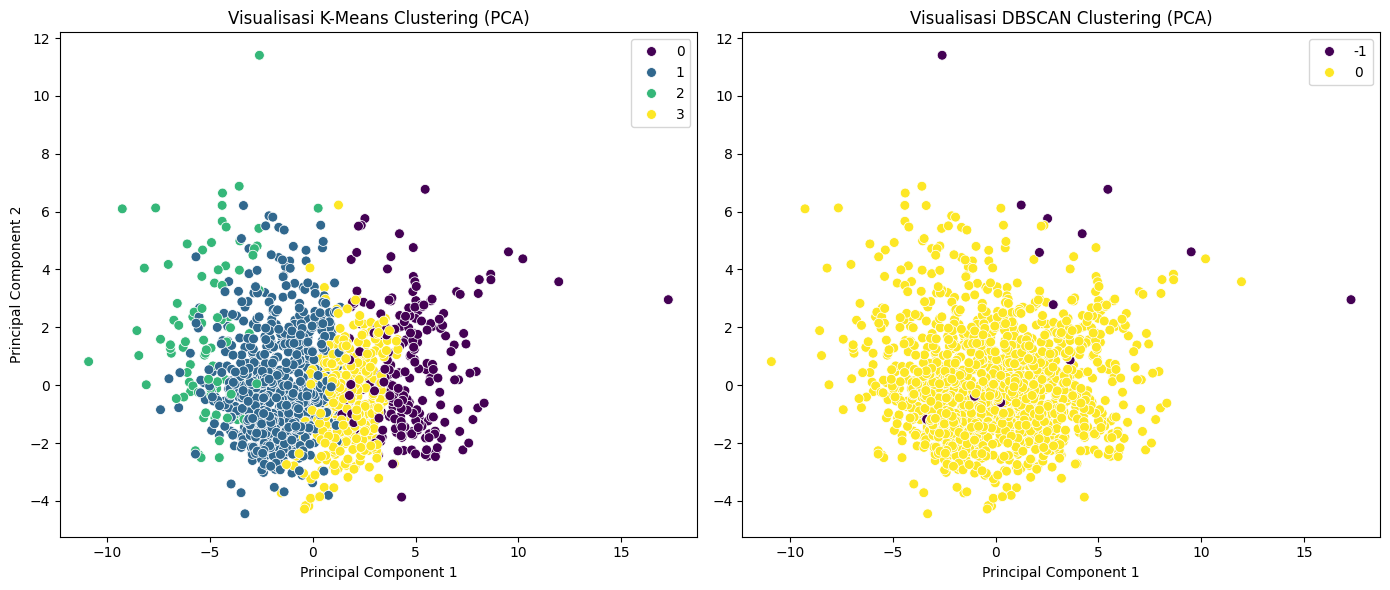

In [126]:
# --- 5. Visualisasi Clustering (2D) ---
print("\n--- Membuat Visualisasi Clustering ---")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(14, 6))

# Plot K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='viridis', legend='full', s=50)
plt.title('Visualisasi K-Means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette='viridis', legend='full', s=50)
plt.title('Visualisasi DBSCAN Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('')
plt.tight_layout()
plt.show()

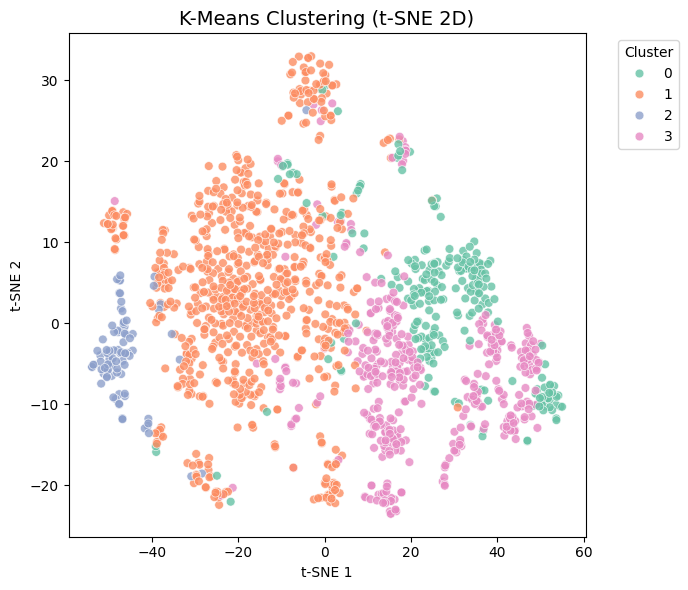

In [127]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=labels_kmeans,
    palette=sns.color_palette("Set2", n_colors=len(np.unique(labels_kmeans))),
    s=40, alpha=0.8
)
plt.title("K-Means Clustering (t-SNE 2D)", fontsize=14)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

**ANN**

In [128]:
print("\n--- Mencari Tetangga Terdekat dengan Annoy ---")

# Bangun indeks Annoy
dim = X_scaled.shape[1]
ann_index = AnnoyIndex(dim, 'euclidean')
for i in range(len(X_scaled)):
    ann_index.add_item(i, X_scaled[i])
ann_index.build(10) # 10 adalah jumlah pohon
print("Indeks Annoy berhasil dibangun.")

# Pilih 4 titik query secara acak
query_points_indices = np.random.choice(len(X_scaled), size=4, replace=False)

# Cari tetangga terdekat
for query_idx in query_points_indices:
    neighbors, distances = ann_index.get_nns_by_item(query_idx, 6, include_distances=True) # Cari 6 agar bisa skip diri sendiri

    print("\n" + "="*50)
    print(f"Query Point Index: {query_idx} (Cluster KMeans: {labels_kmeans[query_idx]})")
    print("="*50)
    print("Tetangga Terdekat dan Jaraknya:")
    for n, d in zip(neighbors, distances):
        if n != query_idx:
            print(f"  - Tetangga Index: {n:4d} | Jarak: {d:.4f} | Cluster (KMeans): {labels_kmeans[n]}")


--- Mencari Tetangga Terdekat dengan Annoy ---
Indeks Annoy berhasil dibangun.

Query Point Index: 748 (Cluster KMeans: 0)
Tetangga Terdekat dan Jaraknya:
  - Tetangga Index: 1016 | Jarak: 3.4085 | Cluster (KMeans): 3
  - Tetangga Index:  476 | Jarak: 3.9337 | Cluster (KMeans): 3
  - Tetangga Index:  257 | Jarak: 4.1773 | Cluster (KMeans): 0
  - Tetangga Index:  216 | Jarak: 4.2127 | Cluster (KMeans): 3
  - Tetangga Index: 1027 | Jarak: 4.2838 | Cluster (KMeans): 0

Query Point Index: 452 (Cluster KMeans: 3)
Tetangga Terdekat dan Jaraknya:
  - Tetangga Index: 1338 | Jarak: 2.7239 | Cluster (KMeans): 3
  - Tetangga Index: 1366 | Jarak: 2.7514 | Cluster (KMeans): 3
  - Tetangga Index:  518 | Jarak: 2.8914 | Cluster (KMeans): 3
  - Tetangga Index: 1240 | Jarak: 3.0809 | Cluster (KMeans): 3
  - Tetangga Index:  469 | Jarak: 3.1661 | Cluster (KMeans): 3

Query Point Index: 828 (Cluster KMeans: 1)
Tetangga Terdekat dan Jaraknya:
  - Tetangga Index:  504 | Jarak: 7.1993 | Cluster (KMeans): 1